In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
from google.colab import files
uploaded = files.upload()

Saving alumni.csv to alumni (1).csv


# Question 1 : Importing CSV file and loading it to a Pandas DataFrame

In [40]:
alumni = pd.read_csv('alumni.csv', encoding='Latin-1')

# Question 2: Exploring the dataset

In [41]:
# a) head: First 5 instances
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [42]:
# b) tail: last 5 instances
alumni.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [43]:
# c) dtypes: data typesof each attribute/feature
alumni.dtypes

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [44]:
# d) info:
alumni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [45]:
# e) describe: Summary statistics of the numerical attributes
alumni.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


# Question 3: Clean Savings Feature

In [46]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

In [47]:
alumni.columns

Index(['Year Graduated', 'Gender', 'Marital Status', 'Diploma Type',
       'Defaulted', 'Salary', 'Fee', 'Savings ($)'],
      dtype='object')

In [48]:
alumni['Savings'] = alumni['Savings ($)'].apply(clean_currency)
alumni.head(3)

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0


In [49]:
# Comparing data types of the Savings attribute before and after cleaning
alumni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Graduated  88 non-null     int64  
 1   Gender          88 non-null     object 
 2   Marital Status  88 non-null     object 
 3   Diploma Type    88 non-null     object 
 4   Defaulted       88 non-null     object 
 5   Salary          88 non-null     int64  
 6   Fee             88 non-null     int64  
 7   Savings ($)     88 non-null     object 
 8   Savings         88 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 6.3+ KB


In [50]:
alumni.drop('Savings ($)', axis=1, inplace=True)

# Question 4: Cleaning the Dataset (Part B):
Cleaning the gender feature:

In [51]:
alumni_2 = alumni.copy()

Method 1: Using the str.replace method to relace the values



In [52]:
alumni.Gender.value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

In [53]:
alumni['Gender'] = alumni['Gender'].replace('M', 'Male')

In [54]:
alumni.Gender.value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

Method 2: Using df.loc to set the values

In [61]:
alumni_2['Gender'].value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

In [63]:
alumni_2.loc[alumni_2['Gender'] == 'M'] = 'Male'

In [64]:
alumni_2['Gender'].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

# Question 5: Working with the dataset

In [65]:
alumni['Savings'].describe()

count        88.000000
mean      47954.545455
std       28324.437721
min        6000.000000
25%       30000.000000
50%       46000.000000
75%       67000.000000
max      146000.000000
Name: Savings, dtype: float64

In [66]:
alumni['Savings'].mean()

47954.545454545456

In [67]:
alumni['Savings'].median()

46000.0

In [68]:
alumni['Savings'].std()

28324.43772089406

In [70]:
alumni.loc[alumni.Fee > 15000]

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings
18,2006,Male,Married,Standard Diploma,No,140000,20960,72000.0


# Question 6: Visualising the Data

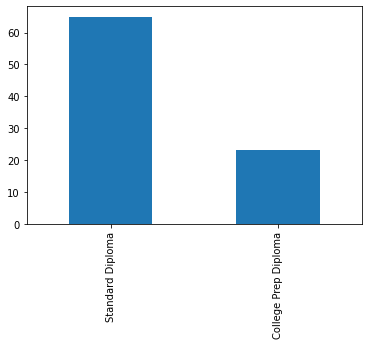

In [77]:
alumni['Diploma Type'].value_counts().plot(kind='bar')

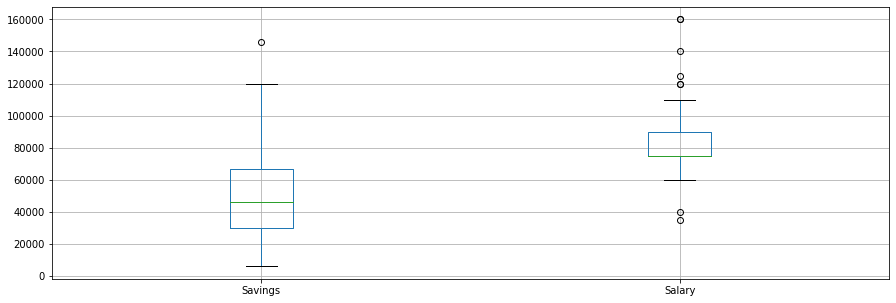

In [79]:
plt.rcParams['figure.figsize'] = (15, 5)
alumni.boxplot(column=['Savings', 'Salary'], grid=True)

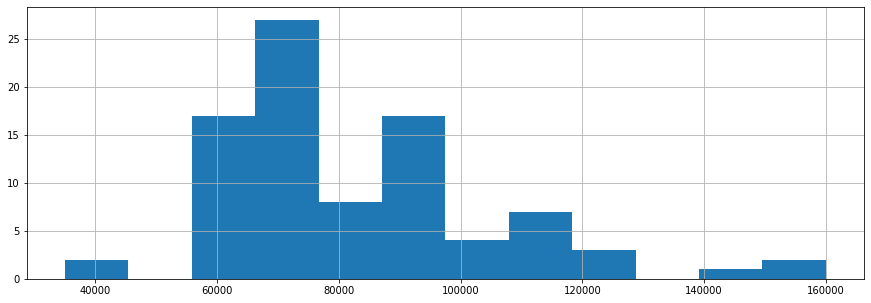

In [81]:
alumni['Salary'].hist(bins=12)

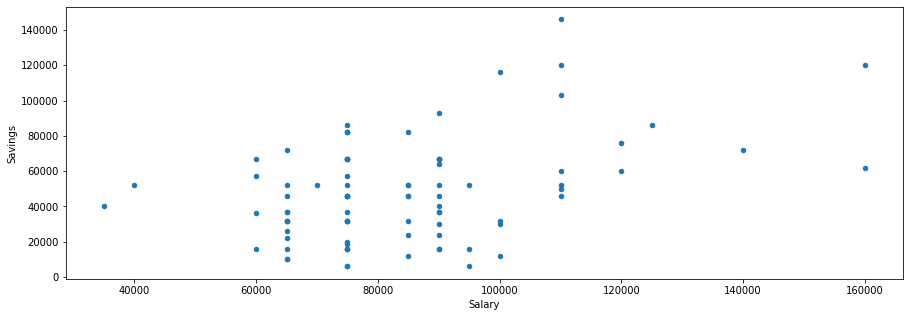

In [85]:
alumni.plot.scatter(x='Salary', y='Savings')

# Question 7: Drawing a contigency table using Marital Status and Defaulted attributes

In [86]:
cont_table = pd.crosstab(alumni['Marital Status'], alumni['Defaulted'], margins=True)
cont_table

Defaulted,No,Yes,All
Marital Status,,,
Divorced,8,11,19
Married,19,16,35
Single,9,25,34
All,36,52,88
